<a href="https://colab.research.google.com/github/rbpernas/Learning_Projects/blob/main/House_prices_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main goal
In this notebook I'll analyze the most significative features of the Kaggle dataset to visualize the relationship between this features and the prices.
The features we are going to analize, as our first Random Forest prediction suggest (NUM AS ROOT priority) are:


*   OverallQual
*   ExterQual
*   Neigborhood
*   GarageCars
*   YearBuilt
*   BsmtQual
*   TotalBsmtSF
*   GrLivArea

Notice that, since we are restricting our analysis to these variables, we are unlikely to achieve the same accuracy as on the first attempt, when we obtained a 0.14553 RMSE value. As I know is difficult (maybe impossible), I'm aiming to improve this score with the few parameters we left.

# Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df_train = pd.read_csv('/content/train.csv')
display(df_train.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Delete values

In [3]:
columns_to_keep = [
    'SalePrice',
    'OverallQual',
    'ExterQual',
    'Neighborhood',
    'GarageCars',
    'YearBuilt',
    'BsmtQual',
    'TotalBsmtSF',
    'GrLivArea'
]

df_train = df_train[columns_to_keep]
display(df_train.head())

,SalePrice,OverallQual,ExterQual,Neighborhood,GarageCars,YearBuilt,BsmtQual,TotalBsmtSF,GrLivArea
0,208500,7,Gd,CollgCr,2,2003,Gd,856,1710
1,181500,6,TA,Veenker,2,1976,Gd,1262,1262
2,223500,7,Gd,CollgCr,2,2001,Gd,920,1786
3,140000,7,TA,Crawfor,3,1915,TA,756,1717
4,250000,8,Gd,NoRidge,3,2000,Gd,1145,2198


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     1460 non-null   int64 
 1   OverallQual   1460 non-null   int64 
 2   ExterQual     1460 non-null   object
 3   Neighborhood  1460 non-null   object
 4   GarageCars    1460 non-null   int64 
 5   YearBuilt     1460 non-null   int64 
 6   BsmtQual      1423 non-null   object
 7   TotalBsmtSF   1460 non-null   int64 
 8   GrLivArea     1460 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 102.8+ KB


The only feature with null values ​​is BsmtQual, so we'll have to check it.

# Analysis of the data

Split the dataset into numeric and sting data


In [5]:
list(set(df_train.dtypes.tolist()))


[dtype('int64'), dtype('O')]

In [6]:
df_num = df_train.select_dtypes(include = ['int64'])
df_num.head()

,SalePrice,OverallQual,GarageCars,YearBuilt,TotalBsmtSF,GrLivArea
0,208500,7,2,2003,856,1710
1,181500,6,2,1976,1262,1262
2,223500,7,2,2001,920,1786
3,140000,7,3,1915,756,1717
4,250000,8,3,2000,1145,2198


In [7]:
df_obj = df_train.select_dtypes(include = ['object'])
df_obj = pd.concat([df_train['SalePrice'], df_obj], axis=1)
display(df_obj.head())

,SalePrice,ExterQual,Neighborhood,BsmtQual
0,208500,Gd,CollgCr,Gd
1,181500,TA,Veenker,Gd
2,223500,Gd,CollgCr,Gd
3,140000,TA,Crawfor,TA
4,250000,Gd,NoRidge,Gd


## Numerical data

In [8]:
df_num.describe()

,SalePrice,OverallQual,GarageCars,YearBuilt,TotalBsmtSF,GrLivArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1.767123,1971.267808,1057.429452,1515.463699
std,79442.502883,1.382997,0.747315,30.202904,438.705324,525.480383
min,34900.000000,1.000000,0.000000,1872.000000,0.000000,334.000000
25%,129975.000000,5.000000,1.000000,1954.000000,795.750000,1129.500000
50%,163000.000000,6.000000,2.000000,1973.000000,991.500000,1464.000000
75%,214000.000000,7.000000,2.000000,2000.000000,1298.250000,1776.750000
max,755000.000000,10.000000,4.000000,2010.000000,6110.000000,5642.000000


array([[<Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'OverallQual'}>],
       [<Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'GrLivArea'}>]], dtype=object)

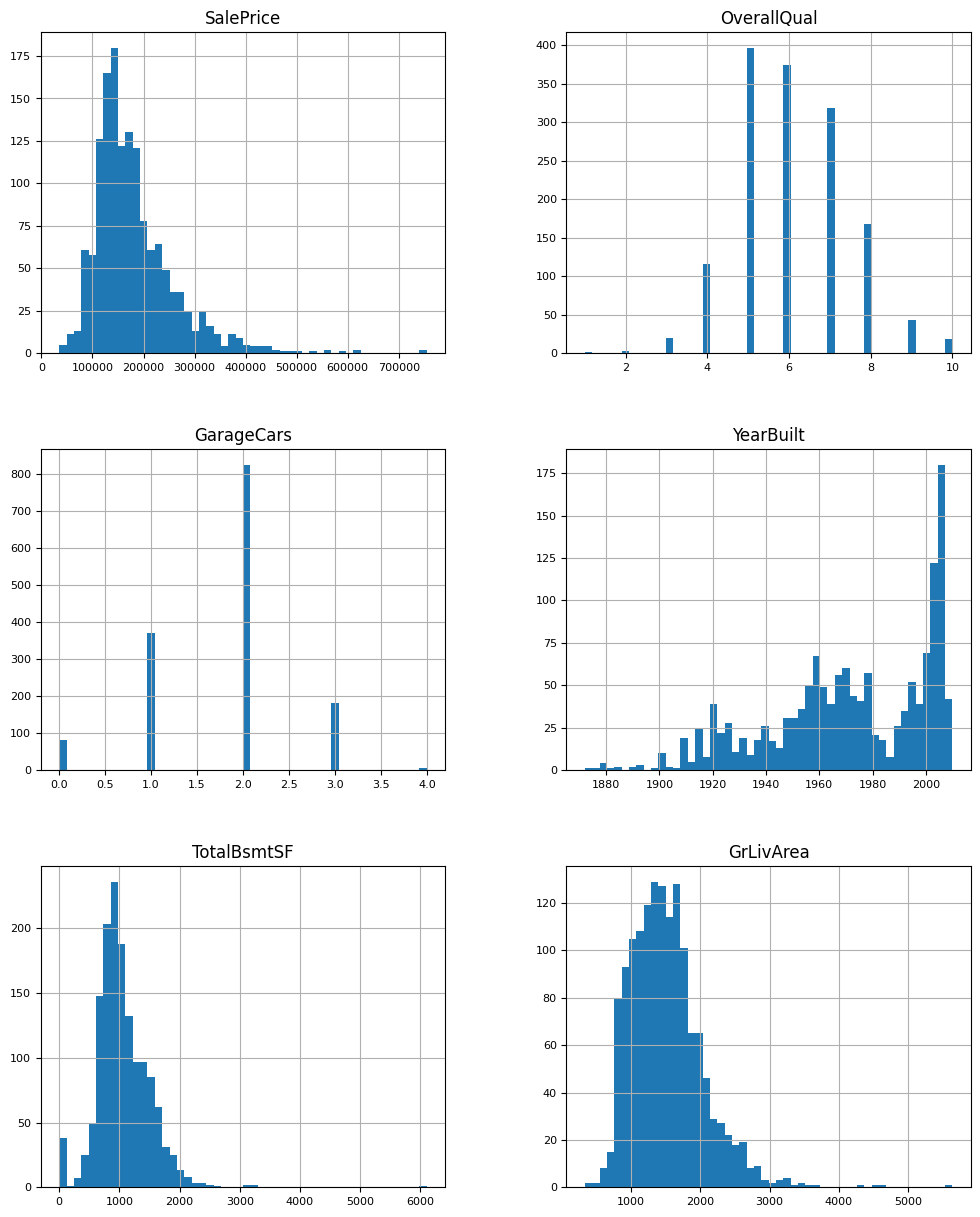

In [9]:
df_num.hist(figsize=(12, 15), bins=50, xlabelsize=8, ylabelsize=8)

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='YearBuilt', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='YearBuilt', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>],
       [<Axes: xlabel='SalePrice', ylabel='GarageCars'>,
        <Axes: xlabel='OverallQual', ylabel='GarageCars'>,
        <Axes: xlabel='GarageCars', ylabel='GarageCars'>,
        <Axes: xlabel='YearBuilt', ylabel='GarageCars'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='GarageCars'>,
        <Axes:

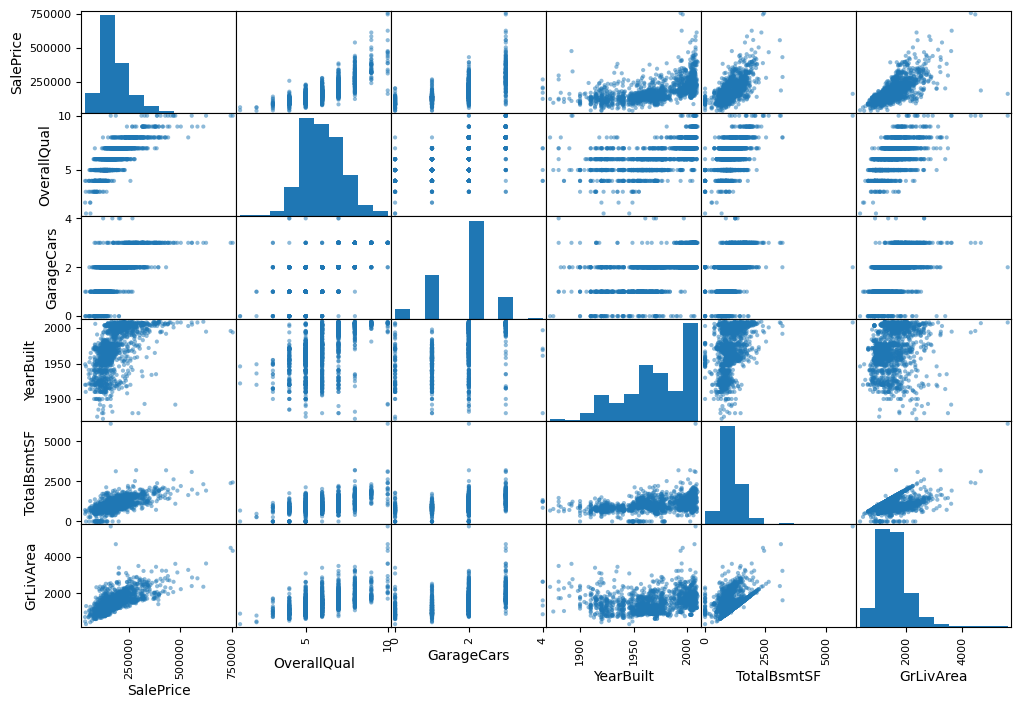

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_num, figsize=(12, 8))

Look for correlations


In [14]:
corr_matrix = df_num.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
TotalBsmtSF,0.613581
YearBuilt,0.522897


As we can see, the correlations are pretty strong, witch means that every single feature have influence in the price.


## Categorical atributes


To discern which type of coding is most appropriate for each feature, we will analyze each one individually.

In [15]:
display(df_obj.head())

,SalePrice,ExterQual,Neighborhood,BsmtQual
0,208500,Gd,CollgCr,Gd
1,181500,TA,Veenker,Gd
2,223500,Gd,CollgCr,Gd
3,140000,TA,Crawfor,TA
4,250000,Gd,NoRidge,Gd


### ExterQual

For the documentation:

ExterQual: Evaluates the quality of the material on the exterior


       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

#### Define Category Order

##### Subtask:
Define the correct ordinal order for the 'ExterQual' categories (e.g., 'Po', 'Fa', 'TA', 'Gd', 'Ex').



**Reasoning**:
To define the ordinal order for 'ExterQual' categories, I will create a Python list named `exter_qual_order` with the specified values in ascending order.



In [21]:
exter_qual_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
print(f"Defined ExterQual order: {exter_qual_order}")

Defined ExterQual order: ['Po', 'Fa', 'TA', 'Gd', 'Ex']


**Reasoning**:
Now that the ordinal order for 'ExterQual' is defined, I will convert the 'ExterQual' column in `df_obj` to a categorical data type using this specified order. This will ensure that the categories are treated as ordered in subsequent operations, like plotting.



In [22]:
df_obj['ExterQual'] = pd.Categorical(df_obj['ExterQual'], categories=exter_qual_order, ordered=True)
print("ExterQual column converted to ordered categorical type.")

ExterQual column converted to ordered categorical type.


**Reasoning**:
With the 'ExterQual' column in `df_obj` now correctly ordered as a categorical type, I will re-create the box plot to visualize the 'SalePrice' distribution by 'ExterQual', ensuring the categories are displayed in the specified ordinal sequence.



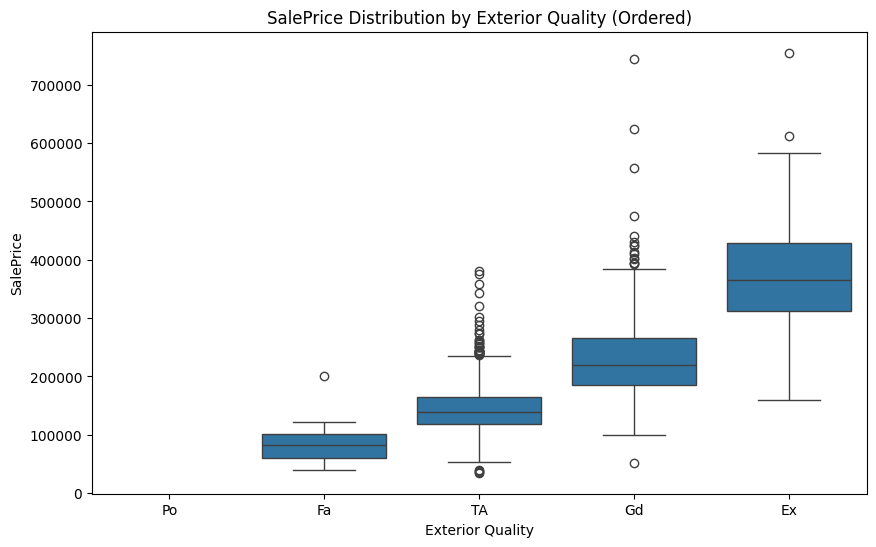

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ExterQual', y='SalePrice', data=df_obj)
plt.title('SalePrice Distribution by Exterior Quality (Ordered)')
plt.xlabel('Exterior Quality')
plt.ylabel('SalePrice')
plt.show()